# Alucar - Analisando Vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('alucar.csv')

In [5]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
alucar.shape

(24, 2)

In [10]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [11]:
alucar.isna().sum().sum()

0

In [12]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [13]:
alucar['mes'] = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## Utilizando seaborn e matplotlib

In [18]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

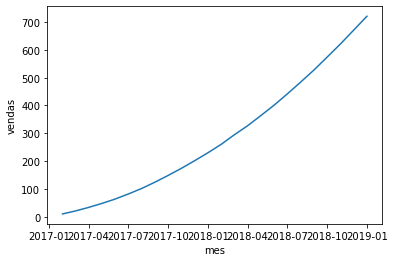

In [19]:
sns.lineplot(x='mes', y='vendas', data=alucar)

### *Para modificar a visualização dos gráficos utilizando seaborn*

**Style guide para impressão de gráficos para artigos e melhor visualização**

<https://urbaninstitute.github.io/graphics-styleguide/>

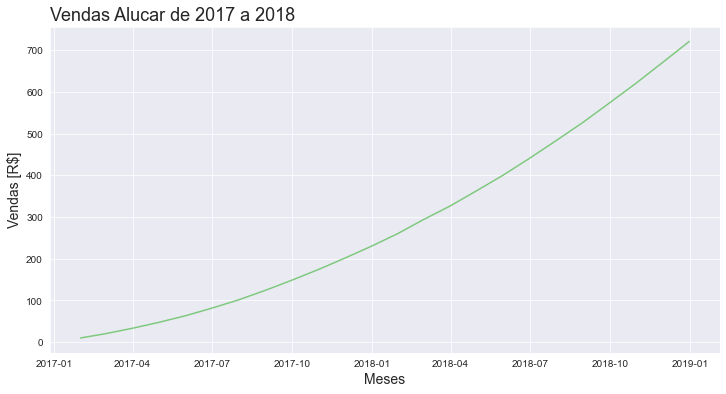

In [26]:
#set de paleta de cores
sns.set_palette('Accent')
#setando uma visualização gráfica com grid
sns.set_style('darkgrid')
#salvando numa variável para imprimir para que não apareça as labels de impressão da biblioteca como: <AxesSubplot:xlabel='mes', ylabel='vendas'>
ax = sns.lineplot(x='mes', y='vendas', data=alucar)

#setando o tamanho do gráfico a ser impresso
ax.figure.set_size_inches(12, 6)

#setando o titulo, alinhamento e tamanho da fonte
ax.set_title('Vendas Alucar de 2017 a 2018', loc='left', fontsize=18)

#setando as labels x e y
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas [R$]', fontsize=14)

#salvando a impressão numa variável para ocultar labels de impressão
ax = ax

## Decompondo as vendas

In [27]:
alucar['aumento'] = alucar['vendas'].diff()
alucar

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


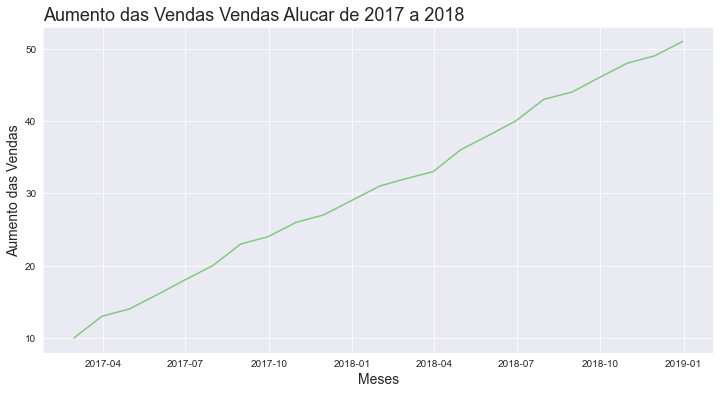

In [28]:
#set de paleta de cores
sns.set_palette('Accent')
#setando uma visualização gráfica com grid
sns.set_style('darkgrid')
#salvando numa variável para imprimir para que não apareça as labels de impressão da biblioteca como: <AxesSubplot:xlabel='mes', ylabel='vendas'>
ax = sns.lineplot(x='mes', y='aumento', data=alucar)

#setando o tamanho do gráfico a ser impresso
ax.figure.set_size_inches(12, 6)

#setando o titulo, alinhamento e tamanho da fonte
ax.set_title('Aumento das Vendas Vendas Alucar de 2017 a 2018', loc='left', fontsize=18)

#setando as labels x e y
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento das Vendas', fontsize=14)

#salvando a impressão numa variável para ocultar labels de impressão
ax = ax

**Criando função para plot dos gráficos lineplot**

In [29]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)

    ax.set_title(str(titulo), loc='left', fontsize=18)

    ax.set_xlabel(str(labelx), fontsize=14)
    ax.set_ylabel(str(labely), fontsize=14)

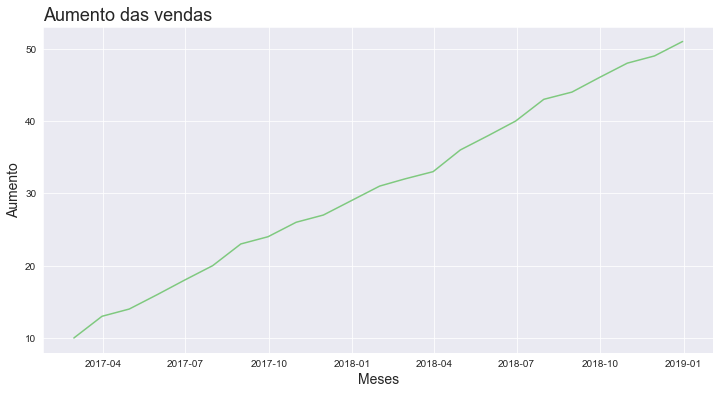

In [30]:
plotar('Aumento das vendas', 'Meses', 'Aumento', 'mes', 'aumento', alucar )

### *Decompondo e criando a aceleração das vendas*

In [31]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


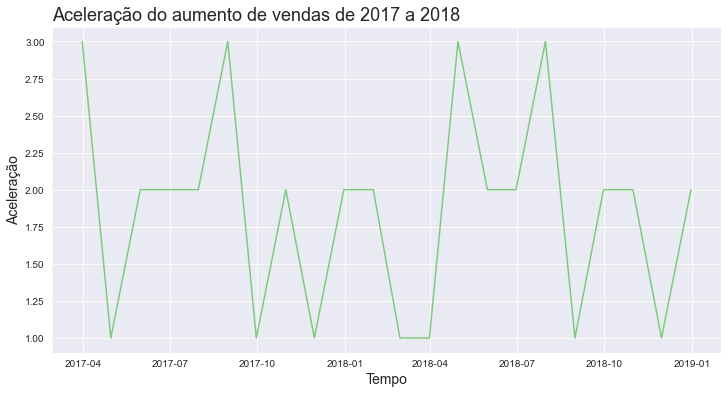

In [32]:
plotar('Aceleração do aumento de vendas de 2017 a 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

### *Criando suplots*

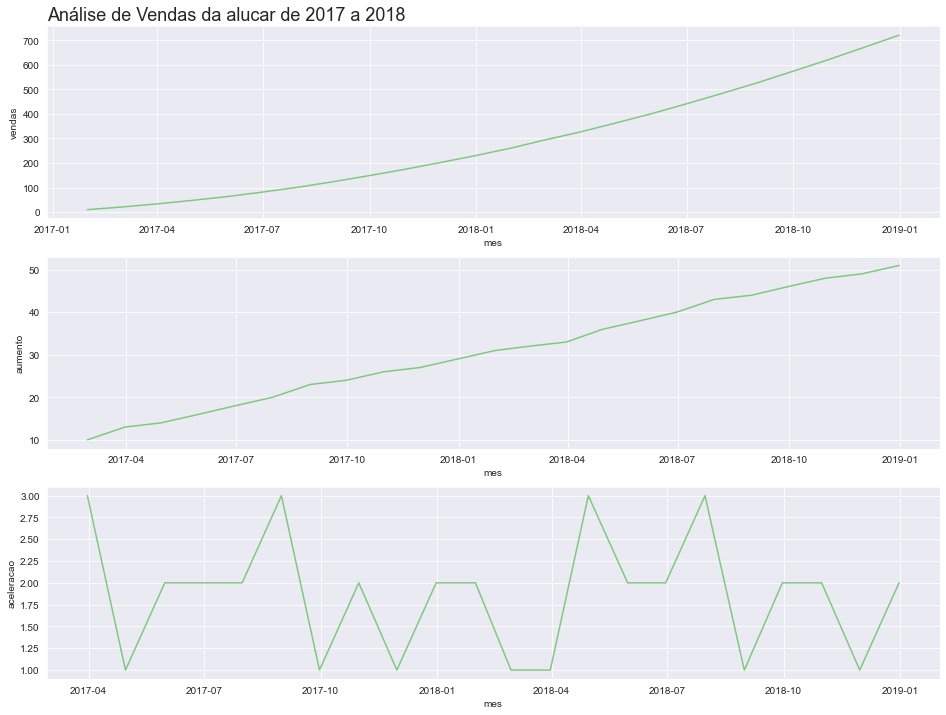

In [37]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [38]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(str(titulo), fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

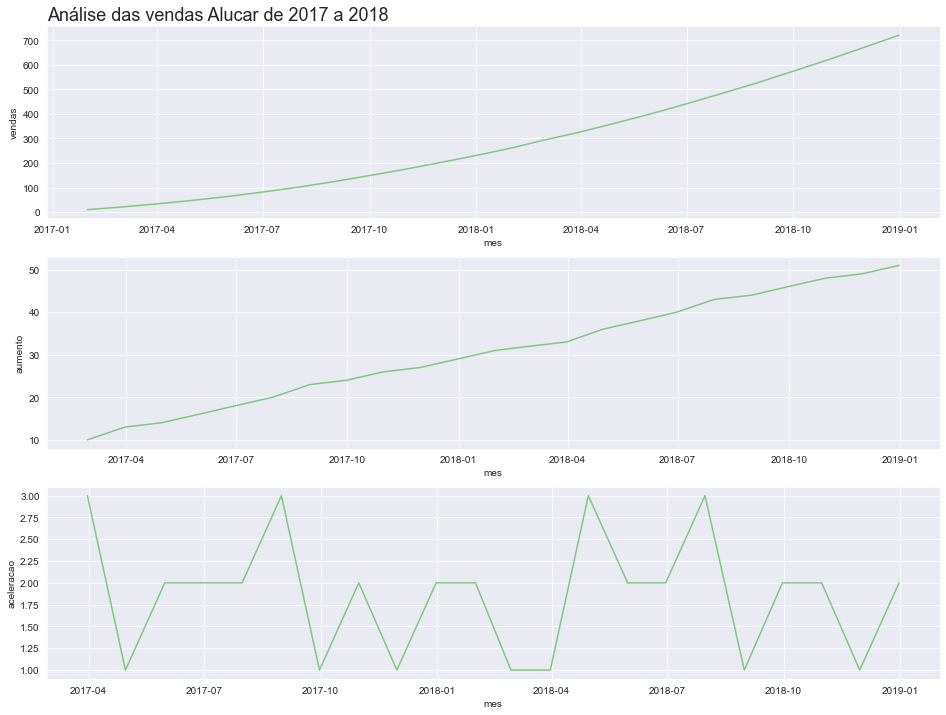

In [39]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas Alucar de 2017 a 2018')

# Função de autocorrelação

Ela é uma medida de correlação entre as observações de uma série temporal. Para entender melhor o funcionamento dela, comparamos os valores com suas próprias correlações, ou seja, consigo mesmas.

Cada passo dado pelo gráfico de correlação será chamado de Lag. Então, a cada passo que damos, estaremos verificando a correlação entre os valores da observação com eles mesmos.

No lag 1, faremos o que foi citado: compararemos os valores com eles mesmos, movimentando-os. Então, conforme passamos os Lags, executamos as comparações para encontrar o nível de correlação.

O nível máximo de correlação que encontraremos será 1. Isso significa que se a correlação for muito alta, o valor a ser encontrado dessa função será 1, e o mínimo, -1. Os valores serão sempre baseados nessa distribuição. O nível de correlação máxima será 1 e o nível de correlação mínima será -1.

In [40]:
from pandas.plotting import autocorrelation_plot

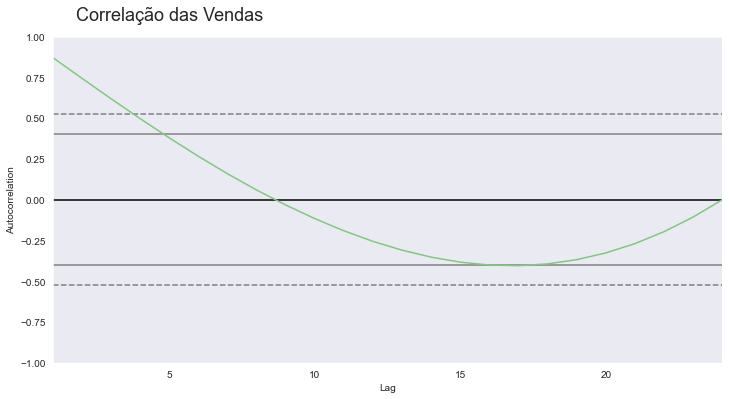

In [42]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

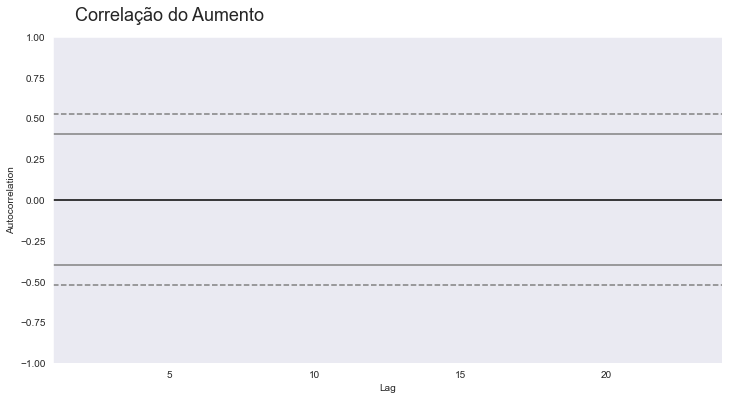

In [43]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'])
ax=ax

Nada é mostrado pois o primeiro valor do alucar['aumento'] é nulo

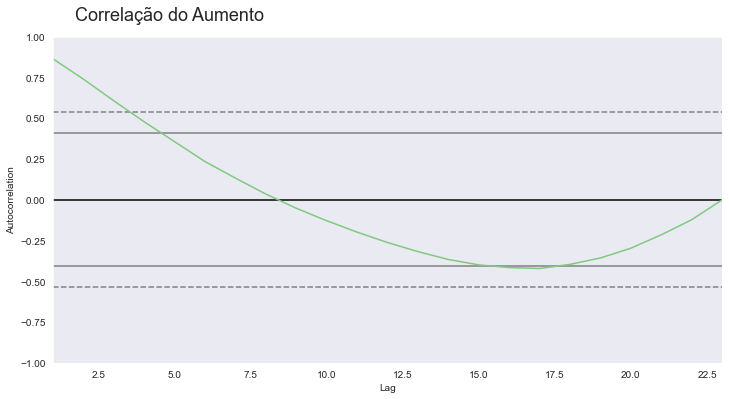

In [44]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

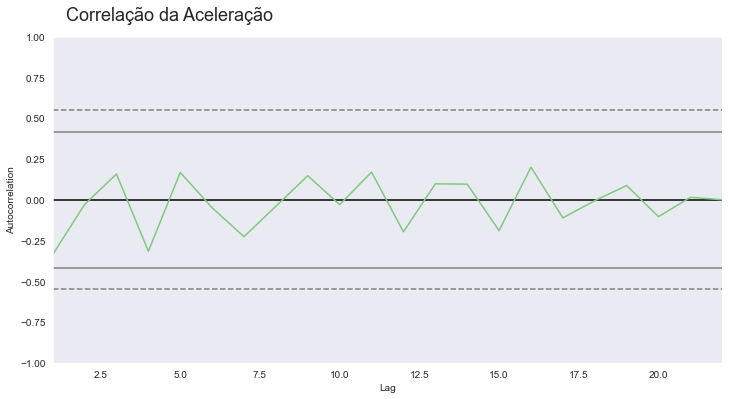

In [45]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

***A partir desses gráficos, podemos concluir que os 7 primeiros meses parecem ter uma ligação muito forte com os meses anteriores. Com o passar dos Lags essa correlação decrescerá.***

O valor de autocorrelação entre 0,7 e 0,9, indica que temos uma correlação forte.
Quanto mais próximo do valor 1 ou -1, dizemos que temos uma correlação forte.

O valor de autocorrelação 1 ou -1 indica uma correlação perfeita.
Com o valor 1, dizemos que existe uma correlação perfeita positiva e -1, uma correlação perfeita negativa.

O valor de autocorrelação 0 indica uma correlação nula.
Lembrando que correlação não é o mesmo que causa e efeito.

# Alucar - Analisando assinantes da newsletter

In [47]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [50]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [52]:
assinantes.shape

(24, 2)

In [53]:
assinantes.isna().sum()

mes           0
assinantes    0
dtype: int64

In [56]:
assinantes['mes'] = pd.to_datetime(assinantes.mes)
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [57]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [58]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


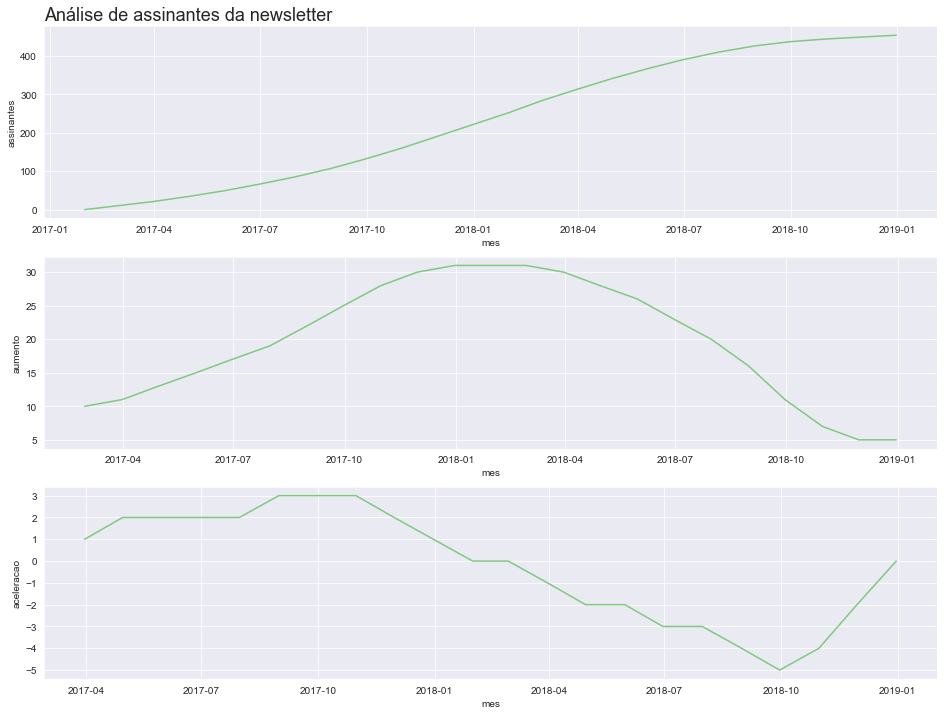

In [59]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                assinantes, 'Análise de assinantes da newsletter')

O primeiro, de assinantes, crescerá inicialmente, depois esse aumento reduzirá, mas a tendência será de crescimento de qualquer forma.

O gráfico de aumento dos assinantes teve um boom, mas chegando num determinado período de tempo, um pouco antes do mês 4 de 2018, o aumento começa a cair.

A aceleração começa positiva, entretanto, se torna negativa muito significantemente. No mês 10 de 2018, chega quase a -5 antes de se recuperar um pouco.

Com esses gráficos, veremos que decompondo as vendas poderemos encontrar casos muito interessantes. Se tivéssemos só o gráfico da análise de assinantes, acharíamos que a tendência seria ao crescimento expressivo, ainda que isso diminua.

Fazendo a decomposição, vemos que de fato houve um crescimento, mas depois o aumento do número de assinantes cai de forma notória. Também ocorre desaceleração dos assinantes da newsletter num determinado momento, havendo aceleração negativa, ainda que ela tenha se iniciado positiva.




# Chocolura

## Analisando as vendas

In [60]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [61]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [63]:
chocolura.mes = pd.to_datetime(chocolura.mes)
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [64]:
chocolura.shape

(24, 2)

In [66]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [67]:
chocolura['aumento']= chocolura['vendas'].diff()
chocolura['aceleracao']=chocolura['aumento'].diff()

In [68]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


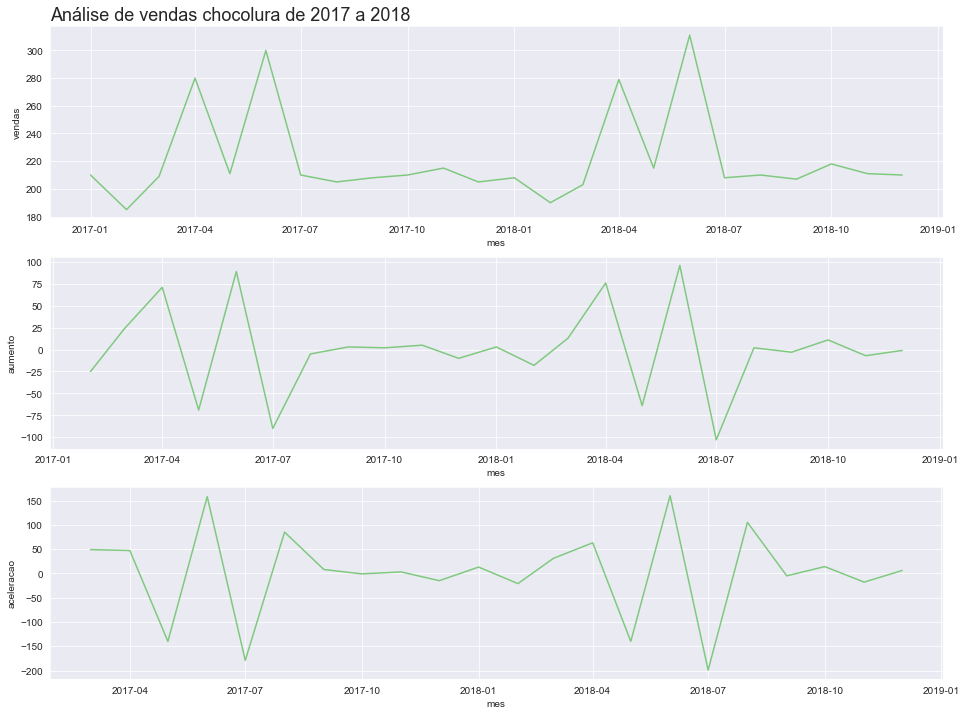

In [70]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               chocolura, 'Análise de vendas chocolura de 2017 a 2018')

Começando com a análise de vendas, o gráfico começa com uma queda das vendas no mês de Janeirode 2017. Há um crescimento grande especificamente no mês 4 e uma queda posterior. Depois, há também um crescimento aproximadamente no mês 7, Junho.

De Julho de 2017 ao mês de Janeiro de 2018 ocorre novamente uma queda, e se repete o crescimento no mês 4 de 2018 e o próximo ao mês 6. Ou seja, o que acontece é que podemos encontrar algo interessante com relação a Time Series: a **sazonalidade**.

A **sazonalidade** *é um padrão repetitivo dentro de um determinado período fixo de tempo*. Ou seja, sempre no mês 4 e no 6 a empresa venderá mais chocolate. Durante os demais meses, vende menos.

Esse comportamento é muito característico das séries temporais. Podemos vê-lo também no aumento. Há um aumento no mês 4 de acordo com o gráfico, e uma grande queda na sequência. Depois as vendas aumentam novamente no mês 6, e há queda de novo. Há uma relativa estabilidade até chegar novamente o mês de Abril do ano seguinte.

Até na aceleração do aumento das vendas é possível visualizar esse crescimento. isso significa que o padrão de sazonalidade é muito forte, pois se mantém em ambos os gráficos de aumento e aceleração.

## Chocolura - Investigação da sazonalidade em vendas diárias em outubro e novembro

In [94]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [95]:
vendas_por_dia.shape

(61, 2)

In [96]:
vendas_por_dia.isna().sum()

dia       0
vendas    0
dtype: int64

In [97]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [98]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia.dia)

In [99]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [100]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


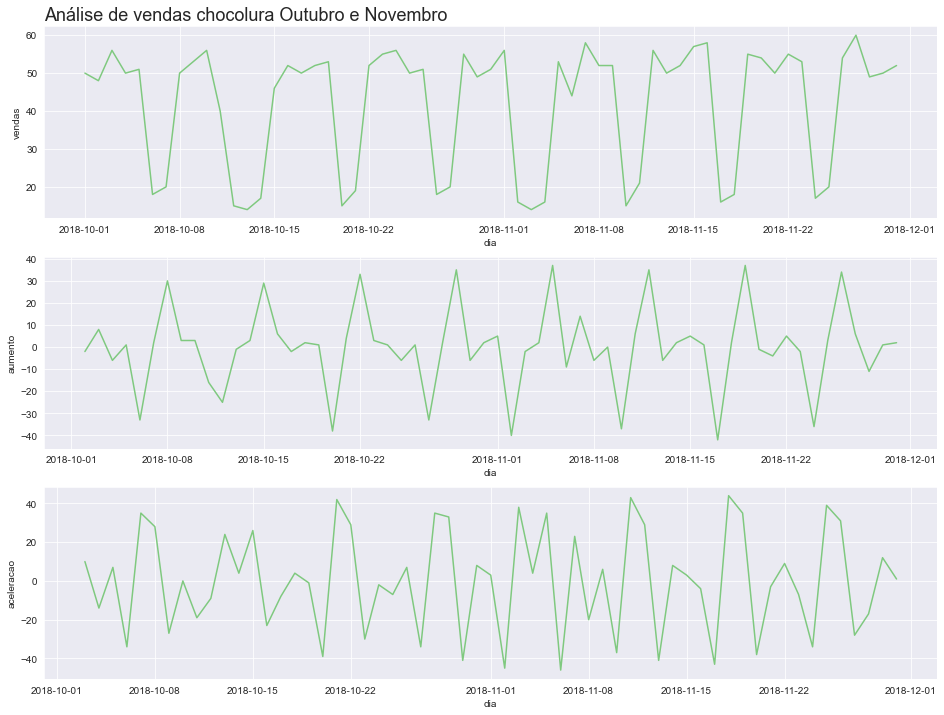

In [101]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               vendas_por_dia, 'Análise de vendas chocolura Outubro e Novembro')

As vendas terão um padrão sazonal mais uma vez, pois estão repetidamente aumentando e diminuindo na sequência, mas diferentemente do gráfico da aula anterior, isso não ocorrerá especificamente em duas datas do comemorativas. Teremos que explorar por qual motivo isso estará acontecendo.

No aumento também haverá o padrão repetitivo de crescimento significativo e queda. Até mesmo a aceleração carregará o reflexo desse padrão.

## Analisando a sazonalidade

In [102]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
#função que encontra os dias da semana de acordo com o calendário NA

In [103]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [104]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [105]:
dias_traduzidos = {
    'Monday':'Segunda', 
    'Tuesday':'Terça', 
    'Wednesday':'Quarta', 
    'Thursday':'Quinta', 
    'Friday':'Sexta', 
    'Saturday':'Sábado',
    'Sunday':'Domingo'
}

In [106]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [107]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [109]:
vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round(2)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.88,3.00,30.75
Quarta,53.11,1.44,2.11
Quinta,51.33,-1.78,-3.22
Segunda,52.33,33.75,30.75
Sexta,44.56,-6.78,-5.00
Sábado,15.88,-27.75,-19.88
Terça,51.67,-0.67,-34.25


In [113]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


No Domingo, a média das vendas será 19.0 e do aumento, 3.0. No sábado, a média das vendas será 16 e a do aumento -28.0. Então sábado de fato será o dia mais fraco para as vendas. Nos demais dias, exceto por Sexta (45.0), Sábado e Domingo, a média das vendas será sempre maior do que 50.

Então,podemos concluir analisando a sazonalidade que as quedas representadas no gráfico serão referentes aos finais-de-semana. Por alguma regra dos negócios da empresa, esses dias, contando com feriados, contaram bastante para a tendência que nosso gráfico apresentará.

### Correlação das vendas diárias

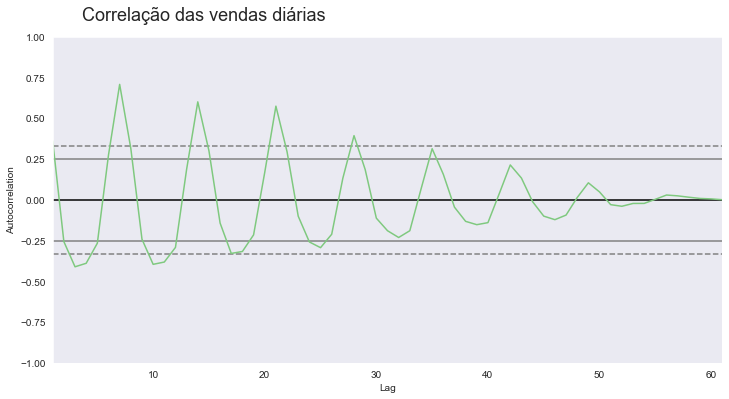

In [114]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

Teremos, então, uma correlação muito forte, que chega a sair da margem de significância atingindo 0.75, e diminui conforme os Lags

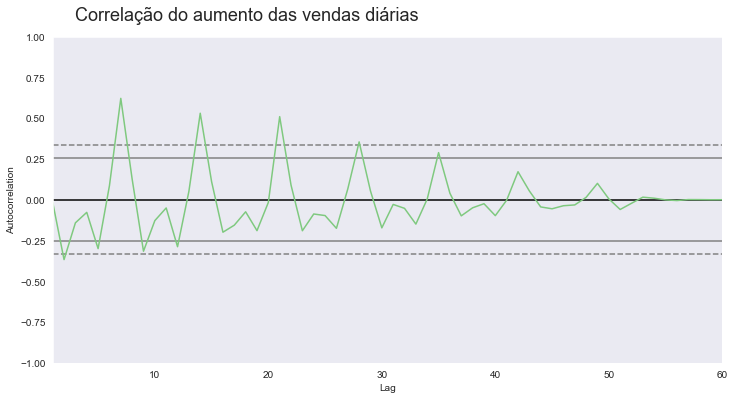

In [116]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

No aumento também uma haverá uma correlação grande e que diminuirá com o passar do tempo.

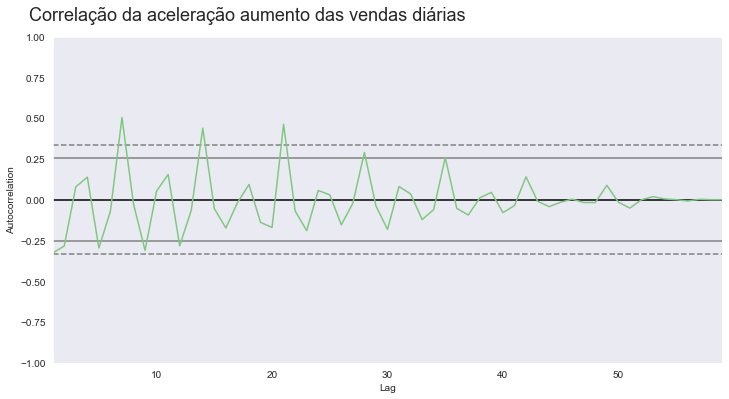

In [117]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

A partir deste temos que também existirá correlação, mas ela será um pouco menor, ainda que influencie. O gráfico ultrapassará positivamente a faixa de significância algumas vezes antes de cair e ficar nulo.

Então, verificamos que existe de fato uma correlação entre o valor das vendas, do aumento, e da aceleração das vendas diárias.




# Cafelura

# Análise de Vendas

In [120]:
cafelura= pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [121]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [122]:
cafelura['mes']=pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [123]:
cafelura.shape

(24, 2)

In [125]:
cafelura.isna().sum()

mes       0
vendas    0
dtype: int64

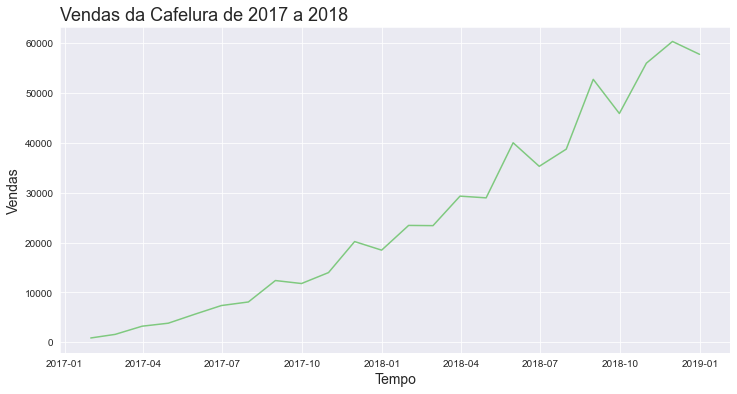

In [126]:
plotar('Vendas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

### Normalizando o gráfico a partir dos finais de semana

In [127]:
quantidade_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [128]:
quantidade_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [129]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


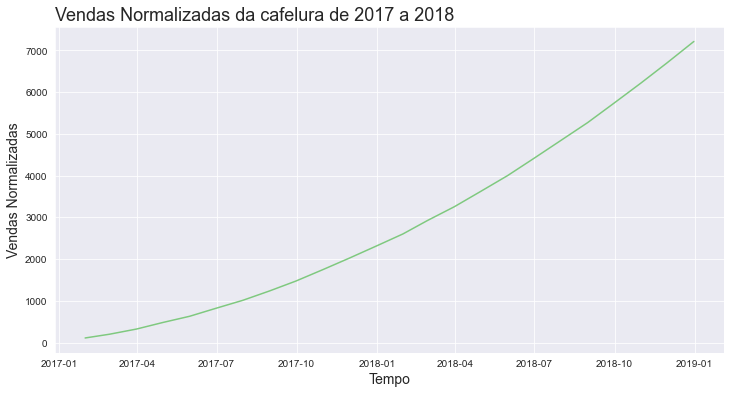

In [130]:
plotar('Vendas Normalizadas da cafelura de 2017 a 2018',
      'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

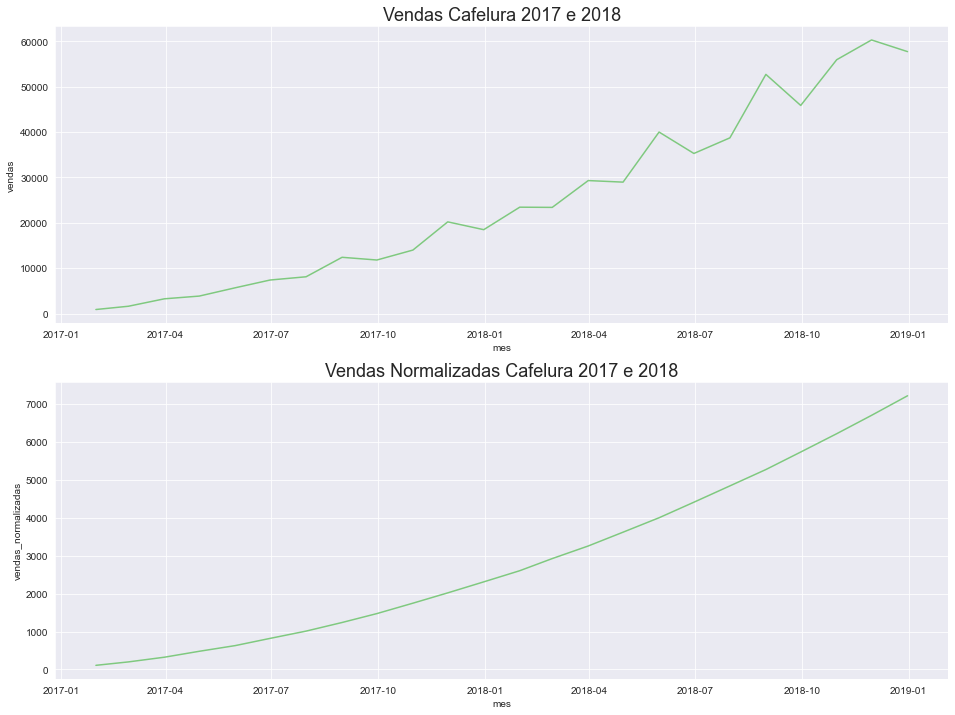

In [133]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# Statsmodel

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

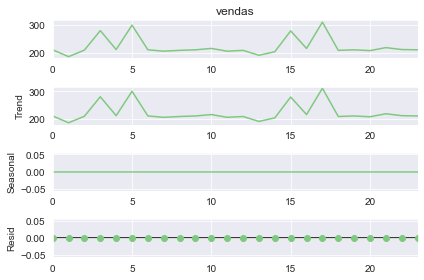

In [140]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

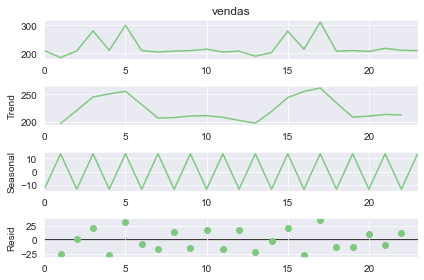

In [141]:
resultado = seasonal_decompose(chocolura['vendas'], period=2)
ax = resultado.plot()

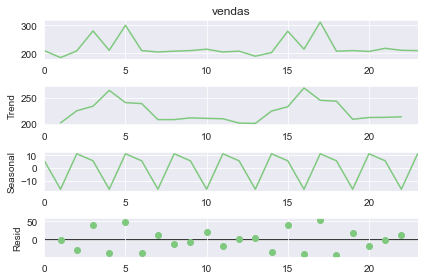

In [142]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

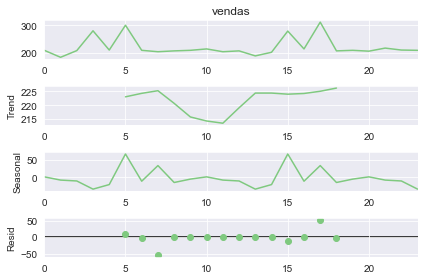

In [143]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

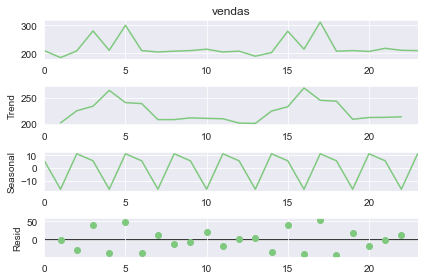

In [147]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [148]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [149]:
data = ({
    'observacao' : observacao,
    'tendencia':tendencia,
    'sazonalidade': sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


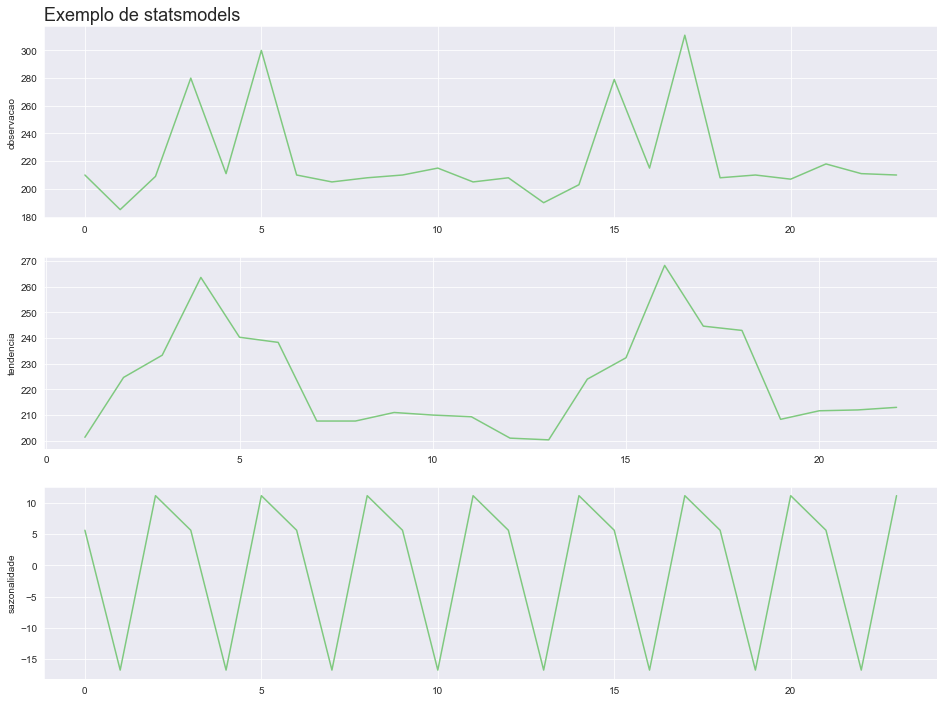

In [151]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
                'Exemplo de statsmodels')

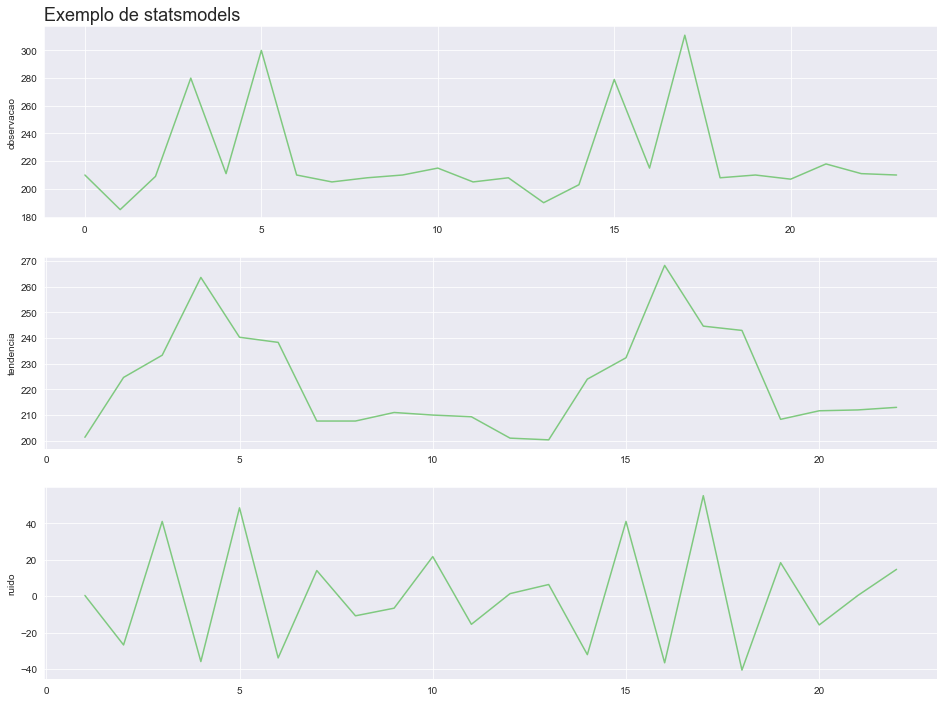

In [152]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado,
                'Exemplo de statsmodels')

# Alucel

# Análise de vendas

In [153]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [154]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [155]:
alucel.dia = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [156]:
alucel.shape

(61, 2)

In [157]:
alucel.isna().sum()

dia       0
vendas    0
dtype: int64

In [158]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


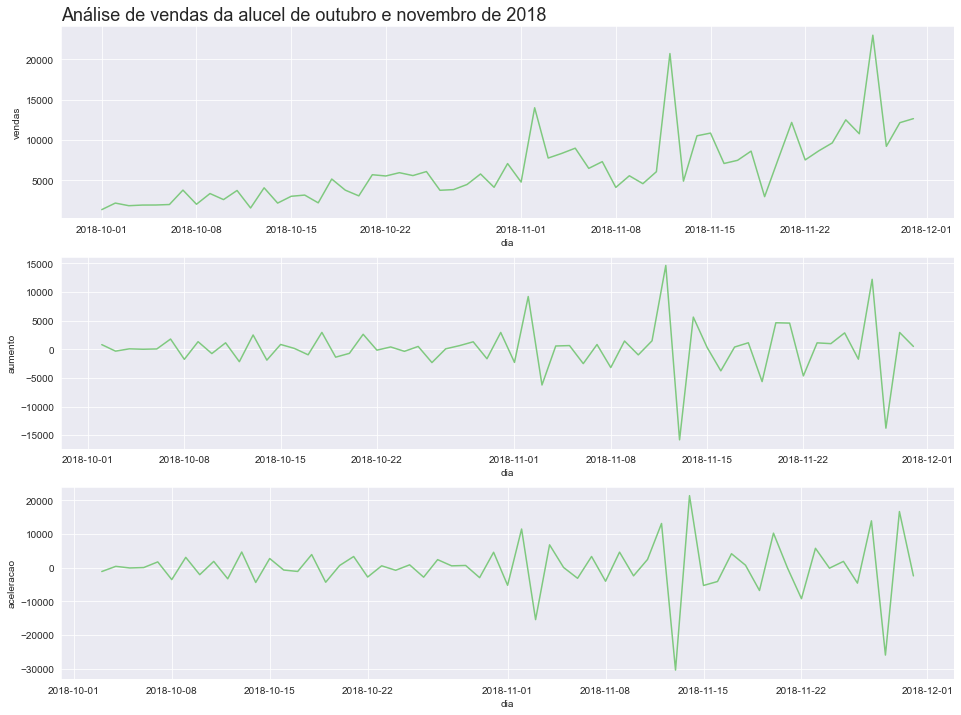

In [159]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               alucel, 'Análise de vendas da alucel de outubro e novembro de 2018')

## Técnica de média móvel

A ideia é tentar minimizar os ruídos de uma série temporal através de médias móveis, pegando dois ou mais pontos e calculando uma média de 7 dias entre eles. Depois, é calculada a média de mais 7 dias, e os pontos serão marcados para minizar a dispersão da frequência.

In [160]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [162]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


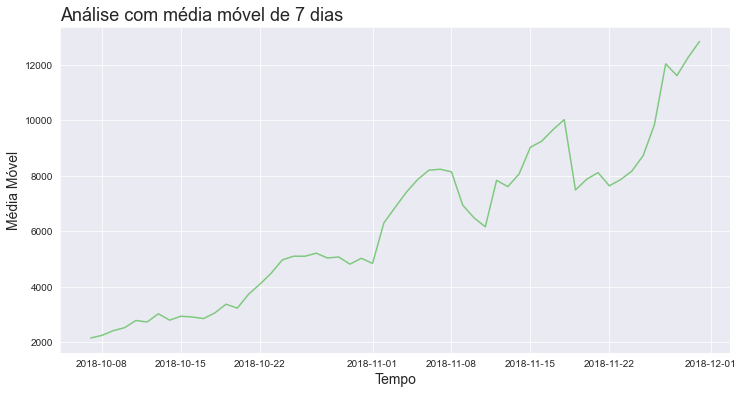

In [163]:
plotar('Análise com média móvel de 7 dias', 'Tempo', 'Média Móvel',
      'dia', 'media_movel', alucel)

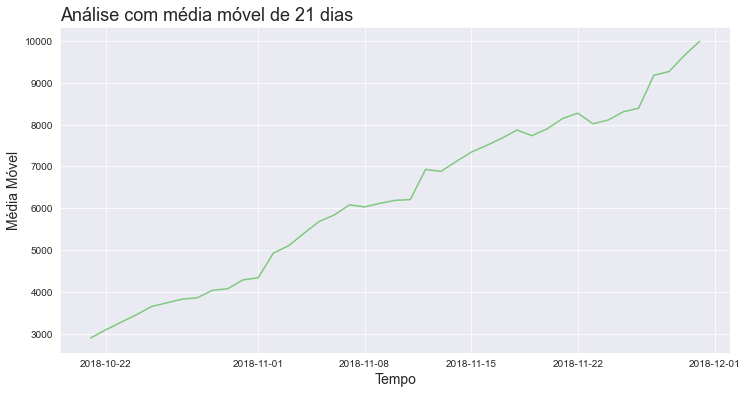

In [165]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise com média móvel de 21 dias', 'Tempo', 'Média Móvel',
      'dia', 'media_movel_21', alucel)

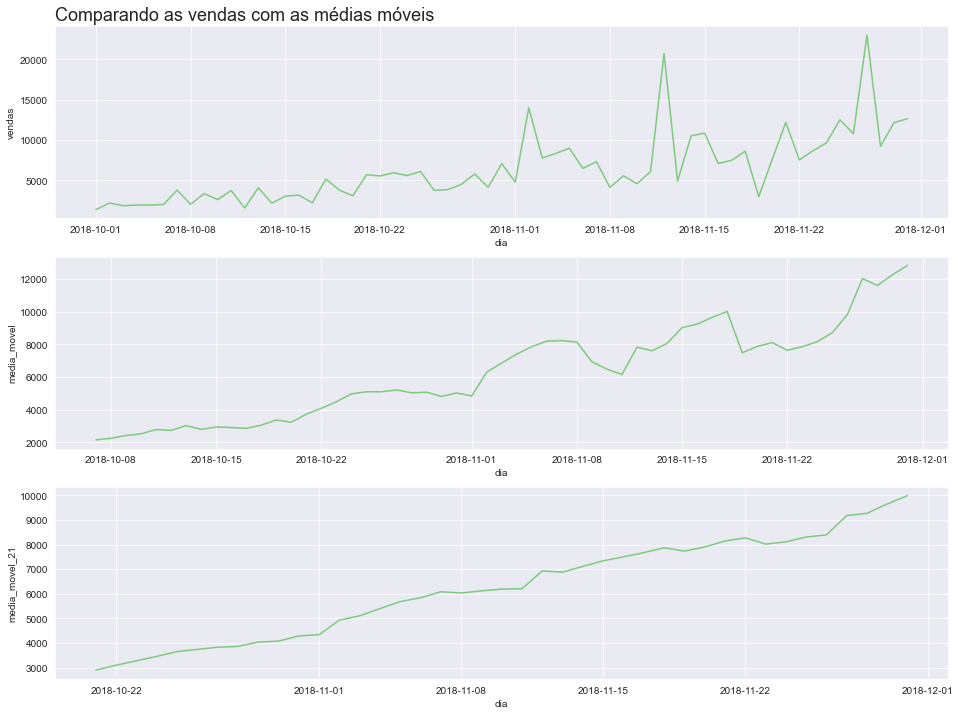

In [166]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
               alucel, 'Comparando as vendas com as médias móveis')

 Os três escrevem as mesmas informações sobre as vendas da empresa, com a diferença da normalização que ocorre de forma mais suave na Média Móvel de 7 dias e mais intensificada na de 21 dias. Mesmo na média de 21 dias vemos que houve uma queda marcada.